Training and Evaluating 1st model ( Random Forest )

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/f1_features_2022_2024.csv')
df.head()

,season,round,race_name,circuit,date,driver,driver_id,constructor,grid,position,...,points,Q1,Q2,Q3,podium,qualifying_time,circuit_encoded,driver_form,constructor_form,grid_advantage
0,2022,9,Canadian Grand Prix,Circuit Gilles Villeneuve,2022-06-19,Alexander Albon,albon,Williams,12,13,...,0.0,94.047,86.858,NaN,0,86.858,7,10.666667,10.666667,-1
1,2022,12,French Grand Prix,Circuit Paul Ricard,2022-07-24,Alexander Albon,albon,Williams,13,13,...,0.0,93.423,93.307,NaN,0,93.307,9,10.666667,10.666667,0
2,2022,14,Belgian Grand Prix,Circuit de Spa-Francorchamps,2022-08-28,Alexander Albon,albon,Williams,6,10,...,1.0,105.672,105.675,105.837,0,105.672,12,11.666667,11.666667,-4
3,2022,15,Dutch Grand Prix,Circuit Park Zandvoort,2022-09-04,Alexander Albon,albon,Williams,15,12,...,0.0,71.695,71.802,NaN,0,71.695,8,12.000000,12.000000,3
4,2022,19,United States Grand Prix,Circuit of the Americas,2022-10-23,Alexander Albon,albon,Williams,8,13,...,0.0,96.932,96.368,NaN,0,96.368,13,11.666667,11.666667,-5


In [3]:
# Drop target and select input features
X = df[[
    'grid',
    'driver_form',
    'constructor_form',
    'circuit_encoded',
    'grid_advantage',
    'qualifying_time'
]]

# Target position to get full race simulation
y = df['position']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [6]:
y_pred = rf_model.predict(X_test)

In [7]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[12  1  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  9  2  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  5  3  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  6  2  1  3  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  4  5  2  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  2  3  7  3  1  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  8  1  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  1  2  3  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  3  2  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  2  1  1  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  2  0  0  0]
 [ 0  0  0  0  0  0  1

C:\Users\HOME\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HOME\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HOME\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

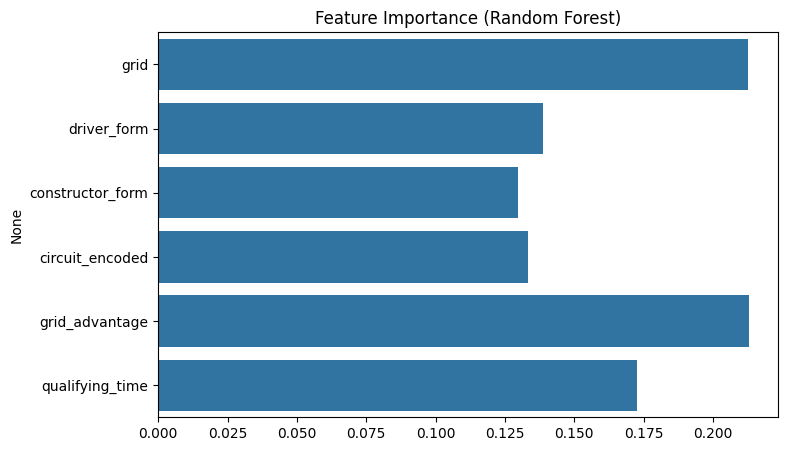

In [8]:
importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.show()

Training and comparing XGBoost Regressor

In [9]:
#pip install xgboost

In [24]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(
    n_estimators=100,        # Number of trees to build
    learning_rate=0.1,       # How much each tree corrects previous one
    max_depth=4,             # Controls overfitting (lower = more regularized)
    random_state=42,         # For reproducibility
)

In [25]:
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [26]:
y_pred_xgb = xgb_reg.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"📊 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📉 Root Mean Squared Error (RMSE): {rmse:.2f}")

📊 Mean Absolute Error (MAE): 1.11
📉 Root Mean Squared Error (RMSE): 1.77


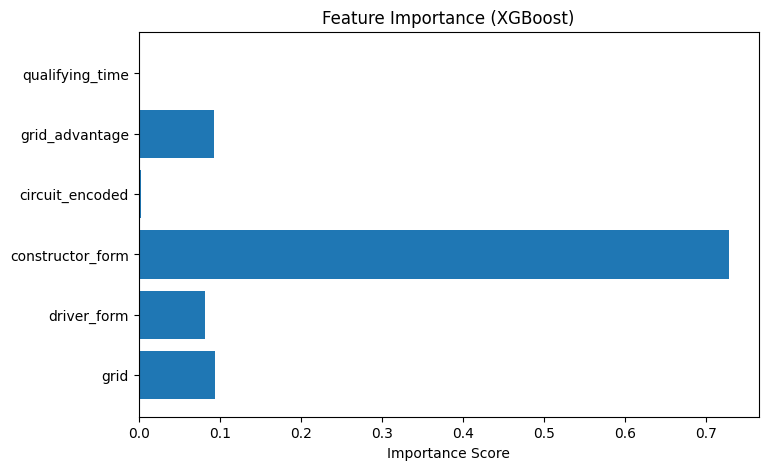

In [28]:
import matplotlib.pyplot as plt

xgb_importance = xgb_model.feature_importances_

plt.figure(figsize=(8, 5))
plt.barh(X.columns, xgb_importance)
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.show()


In [29]:
from scipy.stats import spearmanr

correlation, _ = spearmanr(y_test, y_pred)
print(f"🔗 Spearman Rank Correlation: {correlation:.2f}")

🔗 Spearman Rank Correlation: 0.92


✅ 1. What is a Confusion Matrix?
A confusion matrix is a table that shows how well your classification model is doing by comparing actual values vs predicted values.

📌 Example for Podium Prediction (1 = podium, 0 = not podium)
Predicted Podium (1)	Predicted Not Podium (0)
Actual Podium (1)	TP (True Positive) ✅	FN (False Negative) ❌
Actual Not Podium (0)	FP (False Positive) ❌	TN (True Negative) ✅

🔍 What Each Cell Means:
Term	What it Means
TP	Model correctly predicted podium
TN	Model correctly predicted not podium
FP	Model wrongly predicted podium
FN	Model missed a real podium

✅ 2. Explanation of Evaluation Metrics
🎯 Accuracy
How many total predictions were correct?

python
Copy
Edit
Accuracy = (TP + TN) / (TP + FP + FN + TN)
✅ Use when classes are balanced
⚠️ Not ideal if most drivers don’t podium (which is true!)

🎯 Precision
Of all drivers the model predicted would podium, how many actually did?

python
Copy
Edit
Precision = TP / (TP + FP)
✅ High precision = few false podium predictions
⚠️ If you want to avoid overhyping weak drivers, focus on this.

🎯 Recall
Of all drivers who actually podiumed, how many did the model correctly predict?

python
Copy
Edit
Recall = TP / (TP + FN)
✅ High recall = model doesn’t miss real podium drivers
⚠️ If you want to catch all strong performers, this matters more.

🎯 F1 Score
Balance between precision and recall — best when data is imbalanced.

python
Copy
Edit
F1 = 2 * (Precision * Recall) / (Precision + Recall)
✅ Good overall performance metric in F1-style problems
✅ Used when False Positives & False Negatives both matter



In [30]:
import joblib
joblib.dump(xgb_reg, '../models/f1_position_model.pkl')

['../models/f1_position_model.pkl']

In [21]:
df['circuit'].astype('category').cat.categories


Index(['Albert Park Grand Prix Circuit', 'Autodromo Enzo e Dino Ferrari',
       'Autodromo Nazionale di Monza', 'Autódromo Hermanos Rodríguez',
       'Autódromo José Carlos Pace', 'Bahrain International Circuit',
       'Baku City Circuit', 'Circuit Gilles Villeneuve',
       'Circuit Park Zandvoort', 'Circuit Paul Ricard',
       'Circuit de Barcelona-Catalunya', 'Circuit de Monaco',
       'Circuit de Spa-Francorchamps', 'Circuit of the Americas',
       'Hungaroring', 'Jeddah Corniche Circuit',
       'Las Vegas Strip Street Circuit', 'Losail International Circuit',
       'Marina Bay Street Circuit', 'Miami International Autodrome',
       'Red Bull Ring', 'Shanghai International Circuit',
       'Silverstone Circuit', 'Suzuka Circuit', 'Yas Marina Circuit'],
      dtype='object')

In [22]:
categories = df['circuit'].astype('category').cat.categories
for idx, name in enumerate(categories):
    print(f"{name} → circuit_encoded = {idx}")

Albert Park Grand Prix Circuit → circuit_encoded = 0
Autodromo Enzo e Dino Ferrari → circuit_encoded = 1
Autodromo Nazionale di Monza → circuit_encoded = 2
Autódromo Hermanos Rodríguez → circuit_encoded = 3
Autódromo José Carlos Pace → circuit_encoded = 4
Bahrain International Circuit → circuit_encoded = 5
Baku City Circuit → circuit_encoded = 6
Circuit Gilles Villeneuve → circuit_encoded = 7
Circuit Park Zandvoort → circuit_encoded = 8
Circuit Paul Ricard → circuit_encoded = 9
Circuit de Barcelona-Catalunya → circuit_encoded = 10
Circuit de Monaco → circuit_encoded = 11
Circuit de Spa-Francorchamps → circuit_encoded = 12
Circuit of the Americas → circuit_encoded = 13
Hungaroring → circuit_encoded = 14
Jeddah Corniche Circuit → circuit_encoded = 15
Las Vegas Strip Street Circuit → circuit_encoded = 16
Losail International Circuit → circuit_encoded = 17
Marina Bay Street Circuit → circuit_encoded = 18
Miami International Autodrome → circuit_encoded = 19
Red Bull Ring → circuit_encoded =

In [40]:
import pandas as pd
import joblib

# Step 0: Your manual input (Top 5 drivers – Saudi GP 2024 example)
saudi_input = pd.DataFrame([
    {
        'driver': 'Verstappen',
        'grid': 1,
        'driver_form': 1.0,
        'constructor_form': 1.5,
        'circuit_encoded': 15,
        'grid_advantage': 0,
        'qualifying_time': 77.812
    },
    {
        'driver': 'Leclerc',
        'grid': 2,
        'driver_form': 3.3,
        'constructor_form': 3.5,
        'circuit_encoded': 15,
        'grid_advantage': -1,
        'qualifying_time': 78.201
    },
    {
        'driver': 'Perez',
        'grid': 3,
        'driver_form': 2.7,
        'constructor_form': 2.3,
        'circuit_encoded': 15,
        'grid_advantage': 0,
        'qualifying_time': 78.298
    },
    {
        'driver': 'Norris',
        'grid': 5,
        'driver_form': 5.2,
        'constructor_form': 4.7,
        'circuit_encoded': 15,
        'grid_advantage': -0.2,
        'qualifying_time': 78.954
    },
    {
        'driver': 'Hamilton',
        'grid': 8,
        'driver_form': 6.0,
        'constructor_form': 5.2,
        'circuit_encoded': 15,
        'grid_advantage': 1.0,
        'qualifying_time': 79.624
    }
])

# Step 1: Add actual finishing positions based on real race
saudi_input['actual_position'] = [1, 2, 3, 8, 9]  # <-- based on true 2024 Saudi GP result

# Step 2: Load model and predict
model = joblib.load('../models/f1_position_model.pkl')
X_input = saudi_input.drop(['driver', 'actual_position'], axis=1)

# Predict and round
saudi_input['predicted_position'] = model.predict(X_input)
saudi_input['predicted_position'] = saudi_input['predicted_position'].round(1).astype(int)

# Step 3: Calculate prediction error
saudi_input['error'] = saudi_input['predicted_position'] - saudi_input['actual_position']

# Step 4: Sort by predicted position to simulate race
saudi_result = saudi_input.sort_values('predicted_position')

# Step 5: Display simulated result and error
print(saudi_result[['driver', 'grid', 'predicted_position', 'actual_position', 'error']])


       driver  grid  predicted_position  actual_position  error
0  Verstappen     1                   1                1      0
2       Perez     3                   2                3     -1
1     Leclerc     2                   3                2      1
3      Norris     5                   6                8     -2
4    Hamilton     8                   7                9     -2
